# **Theoretical**

#Q1 What is a Decision Tree, and how does it work?
-> A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by recursively splitting the dataset into subsets based on feature values, forming a tree structure where each internal node represents a decision based on a feature, branches represent possible values, and leaf nodes represent outcomes.

#Q2 What are impurity measures in Decision Trees?
-> Impurity measures quantify the uncertainty or disorder in a dataset at a node. Common impurity measures include Gini Impurity, Entropy, and Variance Reduction (for regression). These measures help decide the best feature to split the data.

#Q3 What is the mathematical formula for Gini Impurity?
->
𝐺
𝑖
𝑛
𝑖
=
1
−
∑
𝑝
𝑖
2
Gini=1−∑p
i
2
​

where
𝑝
𝑖
p
i
​
  is the probability of class
𝑖
i in the node.

#Q4 What is the mathematical formula for Entropy?
->
𝐸
𝑛
𝑡
𝑟
𝑜
𝑝
𝑦
=
−
∑
𝑝
𝑖
log
⁡
2
𝑝
𝑖
Entropy=−∑p
i
​
 log
2
​
 p
i
​

where
𝑝
𝑖
p
i
​
  is the probability of class
𝑖
i.

#Q5 What is Information Gain, and how is it used in Decision Trees?
-> Information Gain measures the reduction in entropy after splitting a dataset based on a feature. It is used to determine the best feature for splitting by selecting the one that maximizes Information Gain.

#Q6 What is the difference between Gini Impurity and Entropy?
->
- Gini Impurity: Measures the probability of incorrectly classifying a randomly chosen element.

- Entropy: Measures the amount of disorder in a dataset.
- Gini is computationally faster, while Entropy provides a more informative split.

#Q7 What is the mathematical explanation behind Decision Trees?
-> Decision Trees use recursive partitioning by selecting splits based on an impurity measure (like Gini or Entropy) and maximizing Information Gain to create a hierarchical tree structure.

#Q8 What is Pre-Pruning in Decision Trees?
-> Pre-Pruning stops the tree from growing beyond a certain depth or node count to prevent overfitting. It applies early stopping conditions such as a minimum number of samples required for a split.

#Q9 What is Post-Pruning in Decision Trees?
-> Post-Pruning involves growing the full tree and then removing nodes that do not contribute significantly to predictive performance, usually based on validation set performance.

#Q10 What is the difference between Pre-Pruning and Post-Pruning?

- Pre-Pruning: Stops tree growth early to prevent complexity.

- Post-Pruning: Allows full tree growth and then removes unnecessary nodes.
Post-Pruning often results in better generalization.

#Q11 What is a Decision Tree Regressor?
-> A Decision Tree Regressor is a Decision Tree model used for regression tasks. Instead of classifying data, it predicts continuous values by minimizing variance within splits.

#Q12 What are the advantages and disadvantages of Decision Trees?
- **Advantages**:

- Easy to interpret and visualize.
- Handles both numerical and categorical data.
- Requires little data preprocessing.
-Works well with feature interactions.

- **Disadvantages**:

- Prone to overfitting without pruning.
- Sensitive to small data variations.
- Can create biased trees if some classes dominate.

#Q13 How does a Decision Tree handle missing values?
->
- Decision Trees can handle missing values by:
- Using surrogate splits (alternative features).
- Assigning the most frequent value in categorical data.
- Using mean/median imputation for numerical data.

#Q14 How does a Decision Tree handle categorical features?
-> Categorical features are handled by:
- One-hot encoding for binary splits.
- Using label encoding (if order exists).
- Grouping similar categories based on target distribution.

#Q15 What are some real-world applications of Decision Trees?
->
- Healthcare: Diagnosing diseases.
- Finance: Credit risk assessment.
- Marketing: Customer segmentation.
- Fraud Detection: Identifying fraudulent transactions.
- Recommendation Systems: Personalizing product suggestions.



# **Practical**


In [8]:
# import necessary Libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [9]:
# 16. Train Decision Tree Classifier on Iris dataset and print accuracy
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [10]:
# 17. Train Decision Tree using Gini Impurity and print feature importances
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train)
print("Feature Importances:", clf_gini.feature_importances_)

Feature Importances: [0.         0.01667014 0.40593501 0.57739485]


In [11]:
# 18. Train Decision Tree using Entropy and print accuracy
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))


Accuracy (Entropy): 1.0


In [12]:
# 19. Train Decision Tree Regressor on housing dataset and evaluate with MSE
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_reg))

Mean Squared Error: 0.5032120152949371


In [13]:
# 20. Visualize the Decision Tree using graphviz
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=iris.feature_names)
print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   |--- class: 2
|   |   |   |--- peta

In [14]:
# 21. Train Decision Tree with max_depth=3 and compare accuracy
# Load the iris dataset (if it's not already loaded)
from sklearn.datasets import load_iris
iris = load_iris()

# Split the iris dataset into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Create and train the Decision Tree Classifier with max_depth=3
clf_depth = DecisionTreeClassifier(max_depth=3)
clf_depth.fit(X_train_iris, y_train_iris)  # Use iris data here

# Make predictions on the test set
y_pred_depth = clf_depth.predict(X_test_iris)  # Use iris data here

# Print the accuracy
print("Accuracy (Max Depth=3):", accuracy_score(y_test_iris, y_pred_depth))

Accuracy (Max Depth=3): 1.0


In [15]:
# 22. Train Decision Tree with min_samples_split=5 and compare accuracy
iris = load_iris()
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf_split = DecisionTreeClassifier(min_samples_split=5)
# Use the Iris data for classification
clf_split.fit(X_train_iris, y_train_iris)  # Changed from X_train, y_train
y_pred_split = clf_split.predict(X_test_iris)  # Changed from X_test
print("Accuracy (Min Samples Split=5):", accuracy_score(y_test_iris, y_pred_split))  # Changed from y_test

Accuracy (Min Samples Split=5): 1.0


In [16]:
# 23. Apply feature scaling before training and compare accuracy
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use DecisionTreeRegressor for continuous target variables (housing prices)
reg_scaled = DecisionTreeRegressor()  # Changed from DecisionTreeClassifier

reg_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = reg_scaled.predict(X_test_scaled)

# Evaluate using Mean Squared Error (MSE) for regression
print("Mean Squared Error (Scaled Features):", mean_squared_error(y_test, y_pred_scaled))
# Changed from accuracy_score

Mean Squared Error (Scaled Features): 0.48946214293519863


In [17]:
# 24. Train Decision Tree using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)
print("Mean Squared Error (Regressor):", mean_squared_error(y_test, y_pred_reg))

Mean Squared Error (Regressor): 0.4994317397907703


In [18]:
# 25. Display feature importance scores
print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.01667014 0.         0.90614339 0.07718647]


In [19]:
# 26. Train Decision Tree Regressor with max_depth=5 and compare with unrestricted tree
reg_depth = DecisionTreeRegressor(max_depth=5)
reg_depth.fit(X_train, y_train)
y_pred_reg_depth = reg_depth.predict(X_test)
print("MSE (Max Depth=5):", mean_squared_error(y_test, y_pred_reg_depth))


MSE (Max Depth=5): 0.5245146178314735


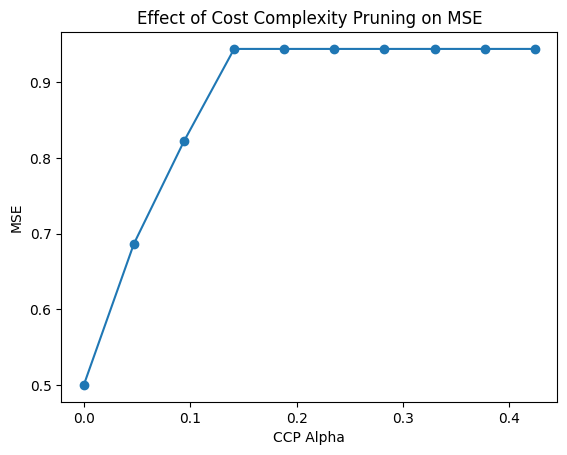

In [7]:
# 27. Apply Cost Complexity Pruning (CCP) and visualize accuracy
# Assuming 'reg' is your DecisionTreeRegressor trained on housing data
# Define and fit 'reg' before using it (if not already defined)
from sklearn.tree import DecisionTreeRegressor  # Import the class
reg = DecisionTreeRegressor()  # Create an instance
# Load the California housing dataset
housing = fetch_california_housing()

# Split the housing dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42
)

reg.fit(X_train, y_train)  # Fit the model with your training data

# Now you can use 'reg' for pruning
path = reg.cost_complexity_pruning_path(X_train, y_train)

# Sample only 10 evenly spaced alpha values
ccp_alphas = np.linspace(min(path.ccp_alphas), max(path.ccp_alphas), num=10)

# Train models with these sampled alpha values
ccp_regs = [DecisionTreeRegressor(ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

# Evaluate MSE for these models
mse_scores = [mean_squared_error(y_test, regressor.predict(X_test)) for regressor in ccp_regs]
# Plot results
plt.plot(ccp_alphas, mse_scores, marker="o")
plt.xlabel("CCP Alpha")
plt.ylabel("MSE")
plt.title("Effect of Cost Complexity Pruning on MSE")
plt.show()

In [22]:
# 28. Evaluate performance using Precision, Recall, and F1-Score
# Assuming clf is your classifier and it has been fitted with iris data
# Assuming X_test_iris and y_test_iris are your test sets for the Iris dataset

# Predict using the classifier on the Iris test set
y_pred_iris = clf.predict(X_test_iris)

# Generate the classification report using the Iris test set and predictions
print(classification_report(y_test_iris, y_pred_iris))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



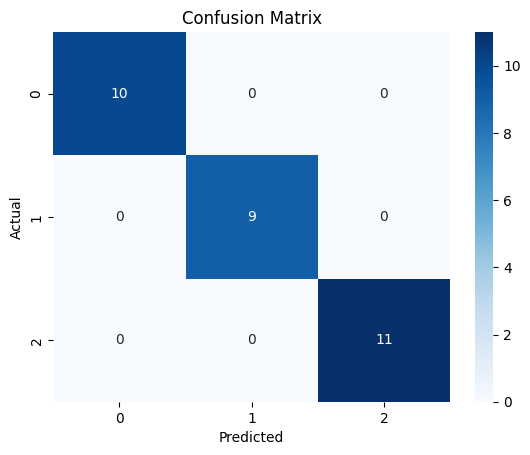

In [23]:
# 29. Visualize the confusion matrix using seaborn
# Use y_test_iris and y_pred_iris for the Iris dataset (classification task)
# Assuming 'clf' is your trained classifier and 'X_test_iris' is your test data
y_pred_iris = clf.predict(X_test_iris)  # Predict on the test set
conf_matrix = confusion_matrix(y_test_iris, y_pred_iris)  # Changed y_test and y_pred
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
# 30. Use GridSearchCV to find optimal max_depth and min_samples_split
param_grid = {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10]}
# Change to DecisionTreeRegressor for continuous target
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
